In [1]:
import os
import glob
import numpy as np
import re
import itertools
import multiprocessing
dir_img = '/home/data/bbd1k_/*image.png'
dir_mask = '/home/data/bbd1k_/*osm.png'

In [2]:
images_dir = glob.glob(dir_img,recursive=True)
mask_dir = glob.glob(dir_img,recursive=True)

In [3]:
os.path.split(images_dir[0])[1].split('-')

['patch', '10', '13', 'image.png']

In [4]:
len([os.path.split(file)[1].split('-')[1] for file in images_dir])

4650

In [5]:
[os.path.split(file)[1].split('-')[1] for file in images_dir]

['10',
 '7',
 '1',
 '66',
 '31',
 '3',
 '13',
 '7',
 '1',
 '12',
 '31',
 '64',
 '69',
 '12',
 '24',
 '25',
 '8',
 '14',
 '11',
 '45',
 '7',
 '36',
 '57',
 '3',
 '11',
 '5',
 '5',
 '61',
 '22',
 '80',
 '9',
 '9',
 '5',
 '8',
 '8',
 '49',
 '9',
 '4',
 '3',
 '0',
 '56',
 '57',
 '72',
 '1',
 '63',
 '36',
 '2',
 '6',
 '6',
 '71',
 '25',
 '2',
 '37',
 '1',
 '3',
 '0',
 '11',
 '32',
 '12',
 '2',
 '7',
 '13',
 '5',
 '15',
 '13',
 '35',
 '10',
 '13',
 '3',
 '0',
 '7',
 '1',
 '21',
 '2',
 '9',
 '5',
 '77',
 '13',
 '63',
 '19',
 '4',
 '4',
 '5',
 '7',
 '9',
 '15',
 '11',
 '6',
 '2',
 '5',
 '20',
 '2',
 '23',
 '41',
 '7',
 '0',
 '30',
 '28',
 '31',
 '6',
 '10',
 '0',
 '0',
 '61',
 '66',
 '7',
 '21',
 '15',
 '69',
 '26',
 '37',
 '2',
 '44',
 '18',
 '15',
 '59',
 '11',
 '8',
 '24',
 '54',
 '14',
 '4',
 '3',
 '12',
 '24',
 '67',
 '45',
 '56',
 '22',
 '0',
 '0',
 '32',
 '73',
 '28',
 '3',
 '18',
 '7',
 '12',
 '63',
 '1',
 '23',
 '62',
 '13',
 '3',
 '84',
 '56',
 '7',
 '15',
 '0',
 '5',
 '3',
 '13',
 '

In [6]:
np.unique(np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1]))

array([0, 1])

In [7]:
ids_1 = [os.path.split(file)[1].split('-')[1] for file in images_dir]
ids_2 = [os.path.split(file)[1].split('-')[2] for file in images_dir]
print(type(ids_1), type(ids_2))
# idx = ids_1+ids_2
idx = list(zip(ids_1, ids_2))
print(len(idx))
print(idx[0])
# idx = list(itertools.product(ids_1, ids_2))
# [file for file in mask_dir if re.search(str(idx[0]) + '-' + str(idx[1]), file)]


<class 'list'> <class 'list'>
4650
('10', '13')


In [9]:
from multiprocessing import Pool
from functools import partial
import cv2
from tqdm import tqdm
def unique_mask_values(idx, mask_dir, mask_suffix):
    # print(idx)
    # print(type(idx[0]), type(idx[1]))
    # print(type(mask_dir[0]), mask_dir[0])
    # print(idx[0] + idx[1])
    # print(idx[0] + '-' + idx[1])
    mask_file = f'/home/data/bbd1k_/patch-{idx[0]}-{idx[1]}-osm.png'
    # pattern = re.compile(re.escape(idx[0]) + '-' + re.escape(idx[1]))
    # mask_file = [path for path in mask_dir if pattern.search(path)]
    # print(type(mask_file), len(mask_file))
    # mask_file = list(glob.glob(mask_dir, idx[0] + '-' + idx[1] + mask_suffix + '.*'))[0]
    mask = np.asarray(cv2.imread(str(mask_file)))
    if mask.ndim == 2:
        return np.unique(mask)
    elif mask.ndim == 3:
        mask = mask.reshape(-1, mask.shape[-1])
        return np.unique(mask, axis=0)
    else:
        raise ValueError(f'Loaded masks should have 2 or 3 dimensions, found {mask.ndim}')
    
with Pool() as p:
    unique = list(tqdm(
        p.imap(partial(unique_mask_values, mask_dir=mask_dir, mask_suffix=''), idx),
        total=len(ids_1))
    )
mask_values = list(sorted(np.unique(np.concatenate(unique), axis=0).tolist()))
print(mask_values)

  0%|          | 0/4650 [00:00<?, ?it/s]

100%|██████████| 4650/4650 [01:58<00:00, 39.22it/s]


[[0, 0, 0], [1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4], [5, 5, 5], [6, 6, 6], [7, 7, 7], [8, 8, 8], [9, 9, 9], [10, 10, 10], [11, 11, 11], [12, 12, 12], [13, 13, 13], [14, 14, 14], [15, 15, 15], [16, 16, 16], [17, 17, 17], [18, 18, 18], [19, 19, 19], [20, 20, 20], [21, 21, 21], [22, 22, 22], [23, 23, 23], [24, 24, 24], [25, 25, 25], [26, 26, 26], [27, 27, 27], [28, 28, 28], [29, 29, 29], [30, 30, 30], [31, 31, 31], [32, 32, 32], [33, 33, 33], [34, 34, 34], [35, 35, 35], [36, 36, 36], [37, 37, 37], [38, 38, 38], [39, 39, 39], [40, 40, 40], [41, 41, 41], [42, 42, 42], [43, 43, 43], [44, 44, 44], [45, 45, 45], [46, 46, 46], [47, 47, 47], [48, 48, 48], [49, 49, 49], [50, 50, 50], [51, 51, 51], [52, 52, 52], [53, 53, 53], [54, 54, 54], [55, 55, 55], [56, 56, 56], [57, 57, 57], [58, 58, 58], [59, 59, 59], [60, 60, 60], [61, 61, 61], [62, 62, 62], [63, 63, 63], [64, 64, 64], [65, 65, 65], [66, 66, 66], [67, 67, 67], [68, 68, 68], [69, 69, 69], [70, 70, 70], [71, 71, 71], [72, 72, 72], [73, 73

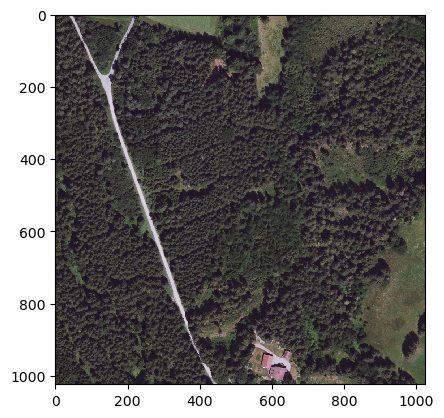

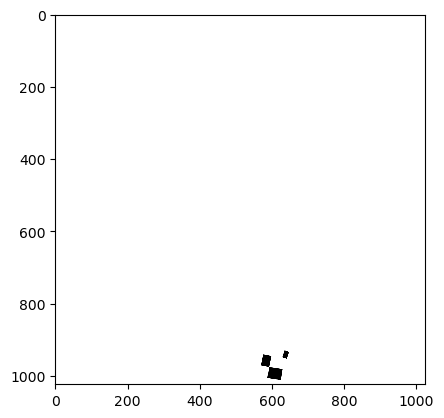

In [4]:
import cv2
from matplotlib import pyplot as plt
mask_file = f'/home/data/bbd1k_/patch-0-6-osm.png'
img_file = f'/home/data/bbd1k_/patch-0-6-image.png'
plt.imshow(cv2.imread(img_file)[:, :, ::-1])
plt.show()
plt.imshow(cv2.imread(mask_file))
plt.show()
# cv2.imshow('mask', cv2.imread(mask_file))

(1024, 1024, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


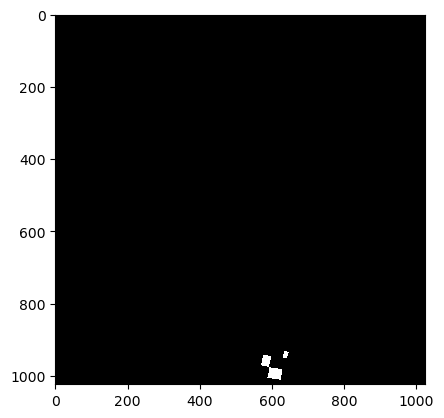

In [31]:
import numpy as np
mask = np.zeros((1024, 1024), dtype=np.int64)
img = cv2.imread(mask_file)
print(img.shape)

mask[(img != 0).all(-1)] = 255
mask = 255-mask
print(mask)
plt.imshow(mask, cmap='gray')
plt.show()

(1024, 1024) (1024, 1024)


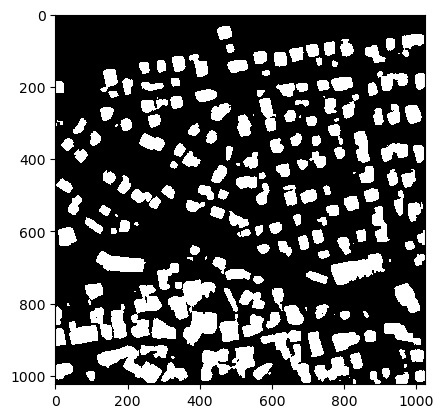

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

true = np.load('mask_true.npy')
pred= np.load('mask_pred.npy')
print(true.shape, pred.shape)
plt.imshow(true, cmap='gray')

plt.imshow(pred, cmap='gray')
plt.show()